# Imports

In [52]:
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Ridge, Lasso, SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

import torch
import torch.nn as nn

from imblearn.over_sampling import SMOTE

# An example of overfitting

In [2]:
# Setting a seed for the random data points
np.random.seed(42)

# Generating the random data points
X = np.linspace(0, 1, 30).reshape(-1, 1)
y = 20 * X.squeeze()**3 - 15 * X.squeeze()**2 + 10 * X.squeeze() + 5
y += np.random.randn(*y.shape) * 2

Text(0.5, 1.0, 'Randomly Generated Datapoints')

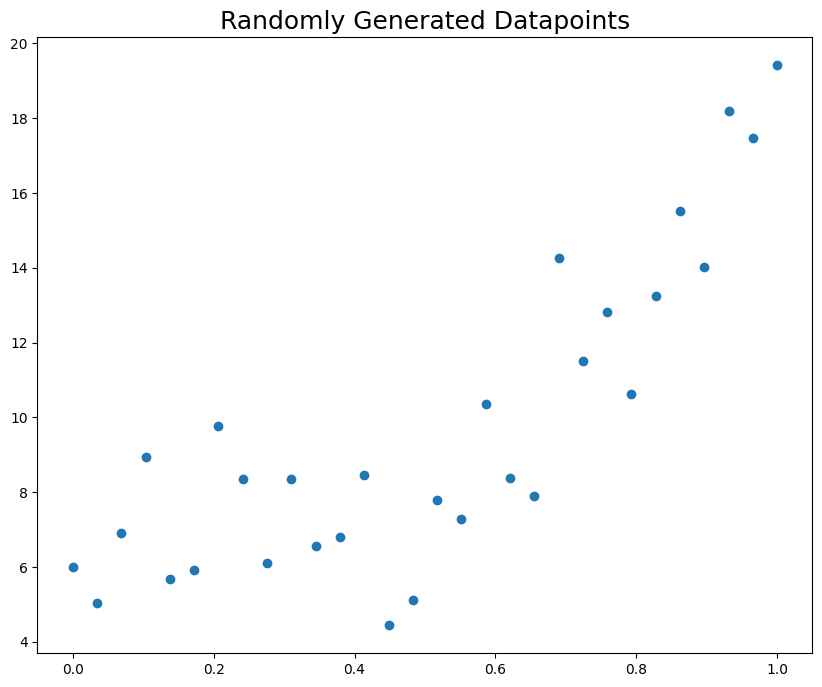

In [3]:
# Plotting our randomly generated datapoints
plt.figure(figsize=(10, 8))
plt.scatter(X, y)
plt.title("Randomly Generated Datapoints", size=18)

In [4]:
# Splitting the data into train test sets with a random state to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# This pipeline transforms the input features to polynomial features of degree 8
# Then we fit the linear regression model on the transformed features
pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=8)),
    ("linear", LinearRegression())
])

# Fitting the pipeline on the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=8)),
                ('linear', LinearRegression())])

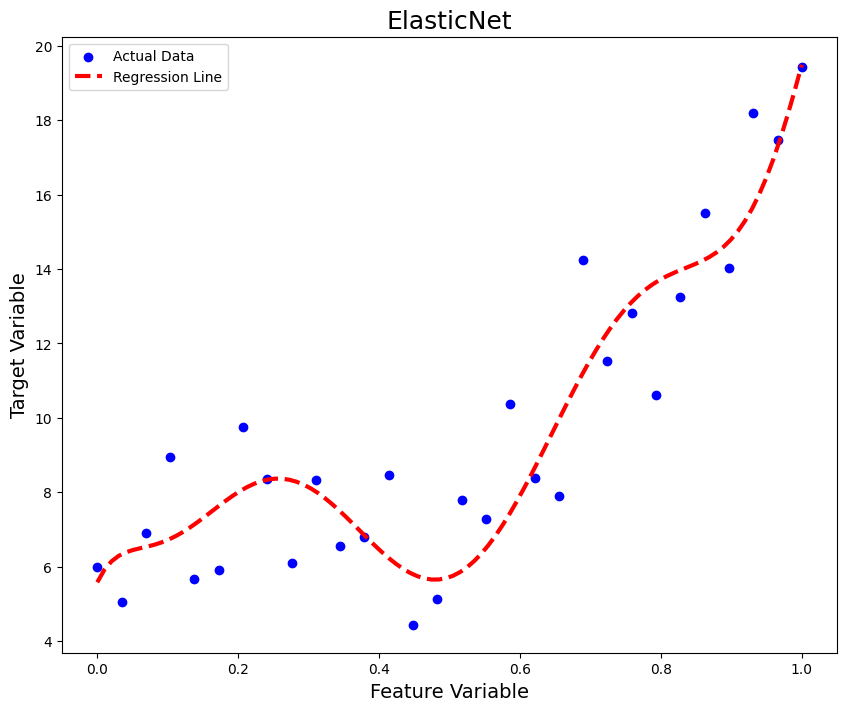

In [12]:
# Generate 100 evenly spaced values within the range of X for a smooth regression curve
X_plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100).reshape(-1, 1)

# Predict y values using the trained model
y_pred = pipe.predict(X_plot)

# Plot actual data
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], y, label="Actual Data", color="blue")

# Plot regression line
plt.plot(X_plot, y_pred, color="red", linestyle="--", linewidth=3, label="Regression Line")

# Labels & title
plt.xlabel("Feature Variable", size = 14)  # Modify with actual feature name
plt.ylabel("Target Variable", size = 14)
plt.legend()
plt.title("ElasticNet", size=18)

# Show plot
plt.show()

In [8]:
# Predict target values on the training set and test set using the trained model
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [11]:
# Calculate the MSE for the training and test predictions
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 1.6713
Test MSE: 5.4532


# L2 Penalty

In [ ]:
# Implementing the L2 penalty in NumPy
# Setting the regularization strength (Lambda)
alpha = 0.1

# Defining a weight vector
w = np.array([2.5, 1.2, 0.8, 3.0])

# Calculating the L2 penalty
l2_penalty = alpha * np.sum(w**2)

In [ ]:
# Implementing the L2 penalty in scikit-learn
# Logistic regression model with no penalty
model = LogisticRegression(penalty="none")

In [ ]:
# Implementing the L2 penalty in scikit-learn
# Ridge regression model with no penalty
model = Ridge(alpha=0)

In [ ]:
# Applyong the L2 penalty to a neural network
# Initializing the SGD optimizer with learning rate 0.01 and no L2 regularization
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0)

# Adding L2 Penalty to our Overfitting Model


In [13]:
# In this pipeline we apply ridge regression to the polynomially transformed features
pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=8)),
    ("ridge", Ridge(alpha=0.5))
])

# Fit the pipeline to the train data
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=8)),
                ('ridge', Ridge(alpha=0.5))])

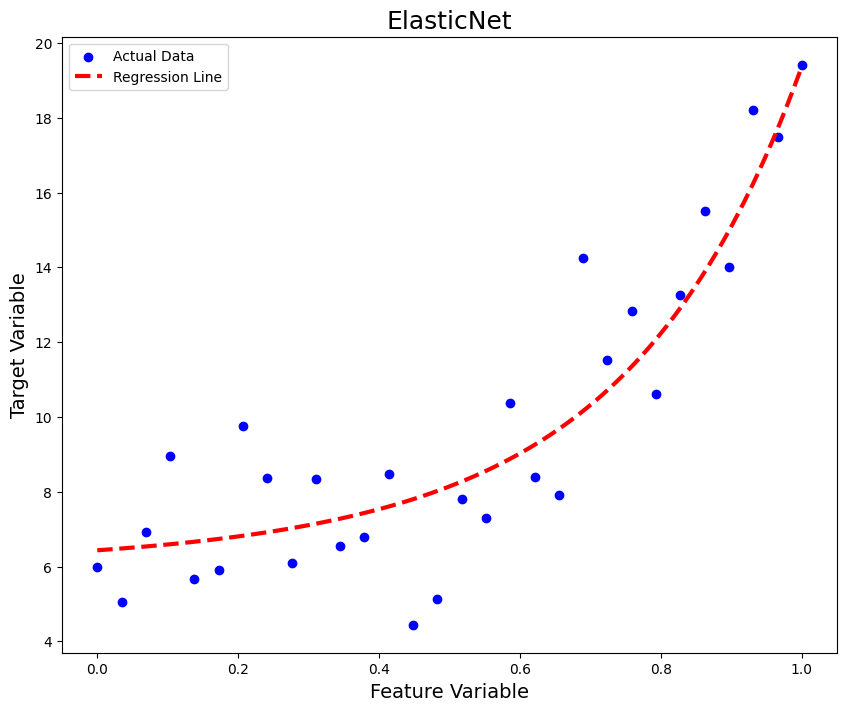

In [14]:
# Generate 100 evenly spaced values within the range of X for a smooth regression curve
X_plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100).reshape(-1, 1)

# Predict y values using the trained model
y_pred = pipe.predict(X_plot)

# Plot actual data
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], y, label="Actual Data", color="blue")

# Plot regression line
plt.plot(X_plot, y_pred, color="red", linestyle="--", linewidth=3, label="Regression Line")

# Labels & title
plt.xlabel("Feature Variable", size = 14)  # Modify with actual feature name
plt.ylabel("Target Variable", size = 14)
plt.legend()
plt.title("ElasticNet", size=18)

# Show plot
plt.show()

In [15]:
# Predict target values on the training set and test set using the trained model
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [16]:
# Calculate the MSE for the training and test predictions
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 2.9305
Test MSE: 1.7757


# L1 Penalty

In [ ]:
# Implementing the L1 penalty in NumPy
# Setting the regularization strength (Lambda)
alpha = 0.1

# Defining a weight vector
w = np.array([2.5, 1.2, 0.8, 3.0])

# Calculating the L1 penalty
l1_penalty = alpha * np.sum(np.abs(w))

In [ ]:
# Implementing the L1 penalty in scikit-learn
# Logistic regression model with L1 penalty
model = LogisticRegression(penalty="l1", solver="liblinear")

In [ ]:
# Implementing the L1 penalty in scikit-learn
# Lasso regression model with alpha set to 0
model = Lasso(alpha=0)

In [ ]:
# Applying the L1 penalty to a neural network
# Defining a simple model
model = nn.Linear(10, 1)

# Setting the regularization strength (Lambda)
alpha = 0.1

# Setting the loss function as MSE
criterion = torch.nn.MSELoss()

# Calculating the loss
loss = criterion(outputs, targets)

# Calculating the penalty
l1_penalty = sum(i.abs().sum() for i in model.parameters())

# Adding the penalty to the loss
loss += alpha * l1_penalty

# Adding L1 Penalty to our Overfitting Model


In [17]:
# In this pipeline we will apply the lasso regression to the polynomially transformed input data
pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=8)),
    ("lasso", Lasso(alpha=0.1))
])

# Fitting the pipeline to the train data
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=8)),
                ('lasso', Lasso(alpha=0.1))])

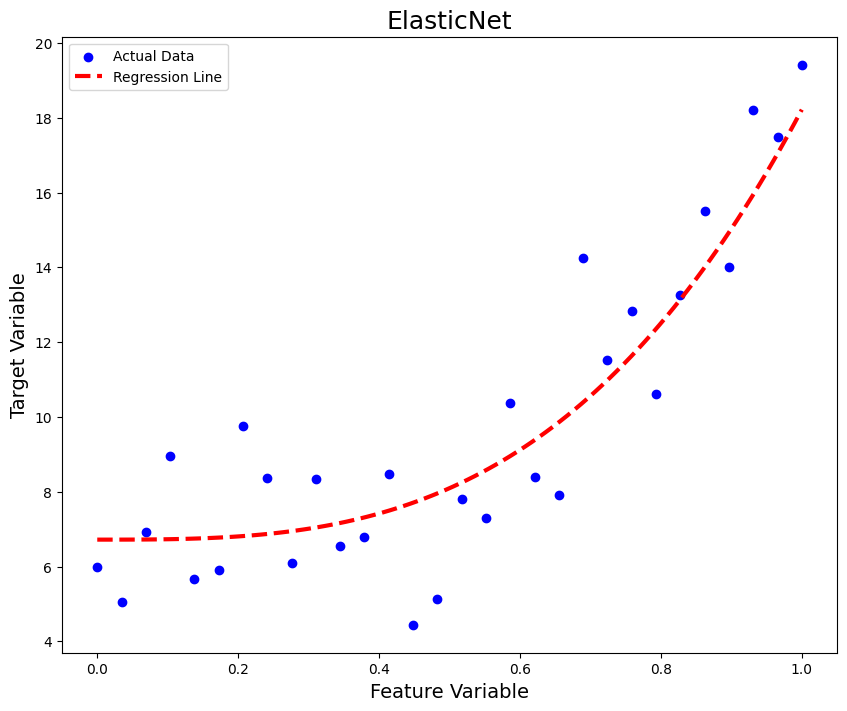

In [18]:
# Generate 100 evenly spaced values within the range of X for a smooth regression curve
X_plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100).reshape(-1, 1)

# Predict y values using the trained model
y_pred = pipe.predict(X_plot)

# Plot actual data
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], y, label="Actual Data", color="blue")

# Plot regression line
plt.plot(X_plot, y_pred, color="red", linestyle="--", linewidth=3, label="Regression Line")

# Labels & title
plt.xlabel("Feature Variable", size = 14)  # Modify with actual feature name
plt.ylabel("Target Variable", size = 14)
plt.legend()
plt.title("ElasticNet", size=18)

# Show plot
plt.show()

In [19]:
# Predict target values on the training set and test set using the trained model
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [20]:
# Calculate the MSE for the training and test predictions
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 2.8759
Test MSE: 2.1135


# Elastic Net

In [ ]:
# Implementing the Elastic Net penalty in NumPy
# Setting the regularization strength (Lambda)
alpha = 0.1

# Setting the mix ratio
r = 0.5

# Defining a weight vector
w = np.array([2.5, 1.2, 0.8, 3.0])

# Calculating the ElasticNet Penalty
e_net = r * alpha * np.sum(np.abs(w)) + (1 - r) / 2 * alpha * np.sum(w**2)

In [ ]:
# Implementing the Elastic Net penalty in scikit-learn
model = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5)

In [ ]:
# Implementing the Elastic Net penalty in scikit-learn
model = ElasticNet(alpha=0, l1_ratio=0.5)

In [ ]:
# Implementing the Elastic Net penalty in neural networks
# Defining a simple model
model = nn.Linear(10, 1)

# Setting the regularization strength (Lambda)
alpha = 0.1

# Setting the loss function as MSE
criterion = torch.nn.MSELoss()

# Calculating the loss
loss = criterion(outputs, targets)

# Calculating the penalty
l1_penalty = sum(i.abs().sum() for i in model.parameters())

# Adding the penalty to the loss
loss += alpha * l1_penalty

# Adding Elastic Net Penalty to our Overfitting Model


In [21]:
# In this pipeline we will apply elastic net regression to the polynomially transforrmed inputs
pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=8)),
    ("elastic", ElasticNet(alpha=0.01, l1_ratio=0.4))
])

# Fitting the pipeline to the train data
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=8)),
                ('elastic', ElasticNet(alpha=0.01, l1_ratio=0.4))])

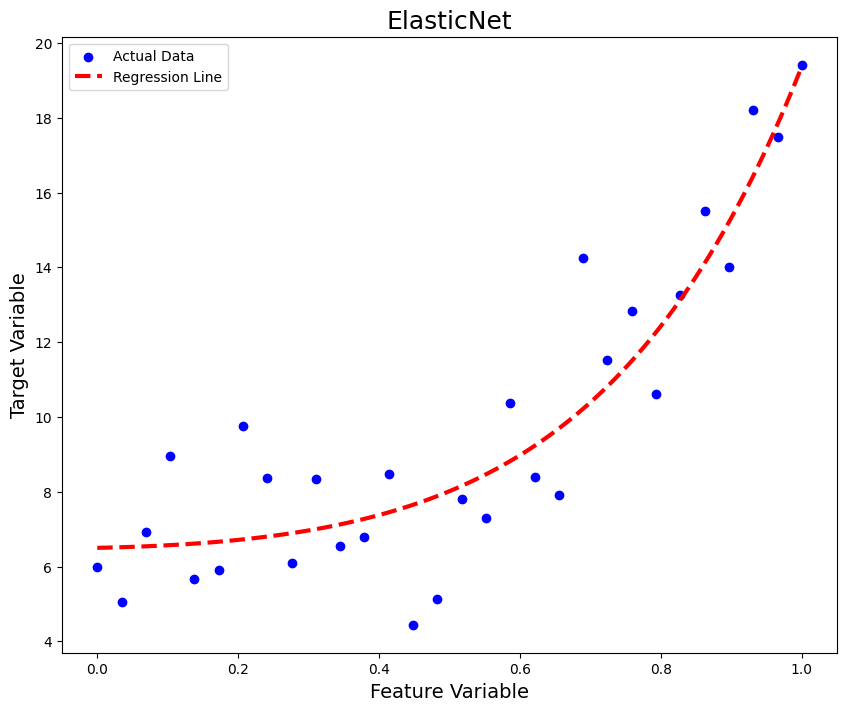

In [22]:
# Generate 100 evenly spaced values within the range of X for a smooth regression curve
X_plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100).reshape(-1, 1)

# Predict y values using the trained model
y_pred = pipe.predict(X_plot)

# Plot actual data
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], y, label="Actual Data", color="blue")

# Plot regression line
plt.plot(X_plot, y_pred, color="red", linestyle="--", linewidth=3, label="Regression Line")

# Labels & title
plt.xlabel("Feature Variable", size = 14)  # Modify with actual feature name
plt.ylabel("Target Variable", size = 14)
plt.legend()
plt.title("ElasticNet", size=18)

# Show plot
plt.show()

In [23]:
# Predict target values on the training set and test set using the trained model
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [24]:
# Calculate the MSE for the training and test predictions
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 2.8328
Test MSE: 1.7885


# Dropout

In [ ]:
# This will create a dropout layer with a 50% chance of being dropped out for each neuron
dropout = nn.Dropout(p=0.5)

# Here we make a random input tensor
x = torch.randn(3, 5)

# Applying dropout to our tensor x
output = dropout(x)

print("Input Tensor:\n", x)
print("\nOutput Tensor after Dropout:\n", output)


Input Tensor:
 tensor([[-1.1867, -1.1420, -1.2446,  1.4264,  1.5535],
        [-0.0945,  0.2584,  2.1090, -0.3436,  0.2447],
        [ 0.6904,  0.6772,  0.0827,  0.8030,  0.8305]])

Output Tensor after Dropout:
 tensor([[-0.0000, -0.0000, -0.0000, 2.8529, 0.0000],
        [-0.0000, 0.5168, 0.0000, -0.0000, 0.4894],
        [1.3807, 1.3544, 0.0000, 0.0000, 0.0000]])


# Early Stopping

In [ ]:
# Initialising a SGDClassifier with early stopping
model = SGDClassifier(early_stopping=True, validation_fraction=0.1, n_iter_no_change=5)

# Fit the model to the training data
model.fit(X_train, y_train)

In [ ]:
# The following code has been taken from [9]
class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.best_score = None
        self.early_stop = False
        self.counter = 0
        self.best_model_state = None

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.best_model_state = model.state_dict()
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.best_model_state = model.state_dict()
            self.counter = 0

    def load_best_model(self, model):
        model.load_state_dict(self.best_model_state)

# Max Norm

In [33]:
# Creating a weight vector
w = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)

# Setting the max norm hyperparameter
r = 6

# calculating the L2 norm of the weight vector
norm = w.norm(2, dim=0, keepdim=True).clamp(min=r/2)
norm

tensor([7.4162])

This block is commented out for experimenting with smaller weight vectors for which the L2 norm is expected to be less than r/2 in order to observe the effect of clamp(min=r/2).

In [27]:
# # Creating a weight vector
# w = torch.tensor([1, 1], dtype=torch.float32)

# # Setting the max norm hyperparameter
# r = 6

# # calculating the L2 norm of the weight vector
# norm = w.norm(2, dim=0, keepdim=True).clamp(min=r/2)
# norm

tensor([3.])

In [34]:
desired = torch.clamp(norm, max=r)
desired

tensor([6.])

This block is commented out to test how clamping affects the norm when the desired max value is larger than r. It’s not needed in the main flow but can be used to experiment with looser max norm constraints.

In [31]:
# desired = torch.clamp(norm, max=8)
# desired

tensor([7.4162])

In [35]:
# Calculate the clipped value of the weight vector
w *= (desired/norm)
w

tensor([0.8090, 1.6181, 2.4271, 3.2362, 4.0452])

In [36]:
# Recalculate the updated norm
norm = w.norm(2)
norm

tensor(6.0000)

# SMOTE

In [38]:
# The following code has been taken from [12]
smote = SMOTE(sampling_strategy='minority')
x, y = smote.fit_resample(x, y)

# Mixup

In [39]:
# Loading the images
img1 = Image.open("bagel.jpg").convert("RGB").resize((128, 128))
img2 = Image.open("croissant.jpg").convert("RGB").resize((128, 128))

# Convert to NumPy arrays
# Dividing by 255 will normalise the pixel intensities into a [0, 1] range.
img1 = np.array(img1) / 255.0
img2 = np.array(img2) / 255.0

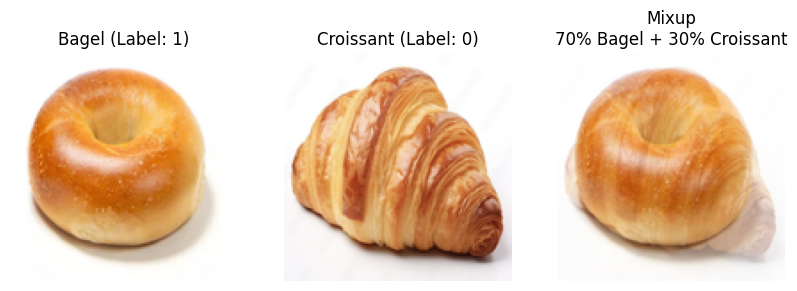

In [ ]:
# Mixup ratio
lam = 0.7

# Mixing our images together based on the mixup ratio
mixed_img = lam * img1 + (1 - lam) * img2

# Ploting the results
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# Display first image
axes[0].imshow(img1)
axes[0].set_title("Bagel (Label: 1)")
axes[0].axis('off')

# Display second image
axes[1].imshow(img2)
axes[1].set_title("Croissant (Label: 0)")
axes[1].axis('off')

# Display mixed image
axes[2].imshow(mixed_img)
axes[2].set_title(f"Mixup\n70% Bagel + 30% Croissant")
axes[2].axis('off')

plt.show()


# Cutout

In [40]:
# Cutout implementation
def apply_cutout(image, mask_size):
    h, w = image.shape[:2]

    # Randomly select the center point for the cutout
    y = np.random.randint(h)
    x = np.random.randint(w)

    # Compute the coordinates for the square cutout and ensure they stay within image bounds
    y1 = np.clip(y - mask_size // 2, 0, h)
    y2 = np.clip(y + mask_size // 2, 0, h)
    x1 = np.clip(x - mask_size // 2, 0, w)
    x2 = np.clip(x + mask_size // 2, 0, w)

    # Create a copy of the original image and apply the cutout by setting the region to zero
    cutout_image = image.copy()
    cutout_image[y1:y2, x1:x2] = 0

    return cutout_image

In [42]:
# Open the image and convert its format to RGB
img = Image.open("cat.jpg").convert("RGB")
# Convert the PIL image to a NumPy array for processing
image = np.array(img)

In [44]:
# Apply cutout with mask size 250
cutout_image = apply_cutout(image, mask_size = 250)

# Display the result
plt.imshow(cutout_image)

In [47]:
# def apply_cutmix(image1, image2, mask_size):
def apply_cutmix(image1, image2, mask_size):
    h, w = image1.shape[:2]

    # Randomly select the center point for the cutout region
    y = np.random.randint(h)
    x = np.random.randint(w)

    # Calculate coordinates of the square region, clipped to image boundaries
    y1 = np.clip(y - mask_size // 2, 0, h)
    y2 = np.clip(y + mask_size // 2, 0, h)
    x1 = np.clip(x - mask_size // 2, 0, w)
    x2 = np.clip(x + mask_size // 2, 0, w)

    # Create a copy of image1 and replace the selected region with a patch from image2
    cutmix_image = image1.copy()
    cutmix_image[y1:y2, x1:x2] = image2[y1:y2, x1:x2]

    return cutmix_image

In [45]:
# Load and preprocess the images (resize and convert to RGB)
img1 = Image.open("cat.jpg").convert("RGB").resize((512, 256))
img2 = Image.open("dog.jpg").convert("RGB").resize((512, 256))

# Convert the PIL images to NumPy arrays
image1 = np.array(img1)
image2 = np.array(img2)

In [50]:
# Apply cutmix with mask size 150
cutmix_image = apply_cutmix(image1, image2, mask_size=150)

# Display the result
plt.imshow(cutmix_image)

# Noise Injection

Adding gaussian noise to the inputs

In [51]:
# Adding Gaussian noise to the dataset X
gaussian_noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
X_with_gaussian_noise = X + gaussian_noise

# Adding Uniform noise to the dataset X
uniform_noise = np.random.uniform(low=-0.1, high=0.1, size=X.shape)
X_with_uniform_noise = X + uniform_noise

Adding gaussian noise to the weights

In [ ]:
# For creating a Gaussian distribution
mean = 0.0
std = 1.0
normal_dist = torch.distributions.Normal(loc=mean, scale=std)

# Creating a fully connected dense layer (input_size=3, output_size=3)
x = nn.Linear(3, 3)

# Creating noise matrix of same size as our layer, filled by noise sampled from a Gaussian distribution.
t = normal_dist.sample((x.weight.view(-1).size())).reshape(x.weight.size())

# Add noise to the weights
with torch.no_grad():
    x.weight.add_(t)

Adding gaussian noise to the gradients

In [ ]:
# Set the mean and standard deviation for Gaussian noise
mean = 0.0
std = 1.0

# Compute gradient
loss.backward()

# Create noise tensor the same shape as the gradient and add it directly to the gradient
with torch.no_grad():
    model.layer.weight.grad += torch.randn_like(model.layer.weight.grad) * std + mean

# update weights with the noisy gradient
optimizer.step()